# Support Vector Machine (SVM)

## features

In [1]:
import finlab.ml as ml

dataset = ml.fundamental_features()
dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2013-05-15  2026729.0   2274053.0     1911110.0  1571884.0   
         2013-08-14  4588992.0   6029953.0      949640.0  1543041.0   
         2013-11-14  5910634.0   5168764.0     5025600.0  1605424.0   
         2014-03-31  5249620.0   8500835.0     6450131.0  2118671.0   
         2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2013-05-15  77246355.0  65913019.0        -211456.0    1999624.0   
         2013-08-14  77139390.0  68971246.0       -1033541.0    3802105.0   
         2013-11-14  77212043.0  73733391.0        -470935.0    5344662.0   
         2014-03-31  87788055.0  70398494.0       -1089134.0    3972292.0   
         2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率  \
stock_id date                                    ...                           
1101     2013-05-15           NaN           NaN  ...         NaN  117.194382   
         2013-08-14     -1.233843      0.944284  ...         NaN  111.842825   
         2013-11-14     -1.130208      2.481737  ...         NaN  104.717879   
         2014-03-31     -0.339410      3.102975  ...         NaN  124.701609   
         2014-05-15     -1.732411      1.630076  ...     8.86688  123.837828   

                      R502_速動比率  R503_利息支出率   R678_營運資金  R607_總資產週轉次數  \
stock_id date                                                           
1101     2013-05-15   83.137456   -8.186859  11333336.0           NaN   
         2013-08-14   79.609613  -13.298556   8168144.0      0.104927   
         2013-11-14   83.502774  -17.083477   3478652.0      0.110355   
         2014-03-31  102.946688  -32.624816  17389561.0      0.119738   
         2014-05-15  101.776758   -9.792979  17732671.0      0.093998   

                     R610_存貨週轉率  R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                                                             
1101     2013-05-15         NaN            NaN          NaN          NaN  
         2013-08-14    2.279272       0.258545     0.201496    9467257.0  
         2013-11-14    2.335831       0.272965     0.211719   12033719.0  
         2014-03-31    2.763869       0.302962     0.222264   -6823797.0  
         2014-05-15    2.191306       0.245688     0.171327    4901868.0  

[5 rows x 48 columns]

In [2]:
dataset.columns
features = ['R103_ROE稅後', 'R402_營業毛利成長率']
dataset = dataset[features].dropna(how='any')
dataset.head()

R103_ROE稅後  R402_營業毛利成長率
stock_id date                                
1101     2014-05-15    1.789978     55.708493
         2014-08-14    3.158575     27.022920
         2014-11-14    3.279737     -5.396195
         2015-03-31    2.554910    -11.807846
         2015-05-15    0.601114    -41.181555

## add prediction

In [3]:
ml.add_profit_prediction(dataset)
dataset.head()

R103_ROE稅後  R402_營業毛利成長率    return
stock_id date                                          
1101     2014-05-15    1.789978     55.708493  1.073347
         2014-08-14    3.158575     27.022920  0.984816
         2014-11-14    3.279737     -5.396195  0.969163
         2015-03-31    2.554910    -11.807846  0.956818
         2015-05-15    0.601114    -41.181555  0.850077

/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 31237 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24460 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29151 missing from current font.
  font.set_text(s, 0.0, flags=f

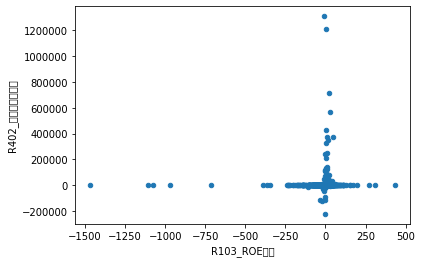

In [4]:
%matplotlib inline
dataset.plot.scatter(features[0], features[1])

## remove outliers

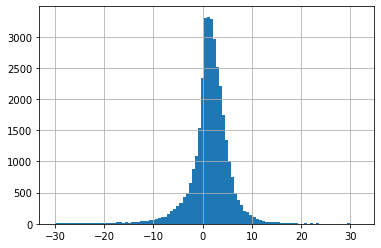

In [5]:
def is_valid(feature, nstd):
    ub = feature.mean() + nstd * feature.std()
    lb = feature.mean() - nstd * feature.std()

    return (feature > lb) & (feature <ub)

valid = is_valid(dataset['R103_ROE稅後'], 2) & is_valid(dataset['R402_營業毛利成長率'], 0.05)
dataset_rmoutliers = dataset[valid].dropna()

dataset_rmoutliers['R103_ROE稅後'].hist(bins=100)
#dataset_rmoutliers['R402_營業毛利成長率'].hist(bins=100)

## Scale features

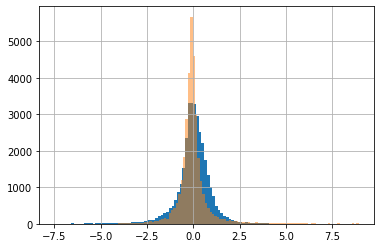

In [6]:
import pandas as pd
import sklearn.preprocessing as preprocessing

dataset_scaled = pd.DataFrame(preprocessing.scale(dataset_rmoutliers), index=dataset_rmoutliers.index, columns=dataset_rmoutliers.columns)
dataset_scaled.head()

dataset_scaled['R103_ROE稅後'].hist(bins=100)
dataset_scaled['R402_營業毛利成長率'].hist(bins=100, alpha=0.5)
dataset_scaled['return'] = dataset_rmoutliers['return']


## Training

In [7]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset_scaled, test_size=0.1, random_state=0)

from sklearn.svm import SVC

cf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

cf.fit(dataset_train[features], dataset_train['return'] > dataset_train['return'].quantile(0.5))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

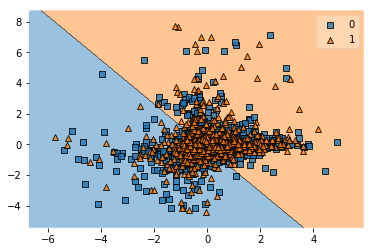

In [10]:
from mlxtend.plotting import plot_decision_regions

features_plot = dataset_test[features].values
labels_plot = (dataset_test['return'] > dataset_test['return'].quantile(0.5)).astype(int).values

plot_decision_regions(features_plot, labels_plot, cf)

## backtest

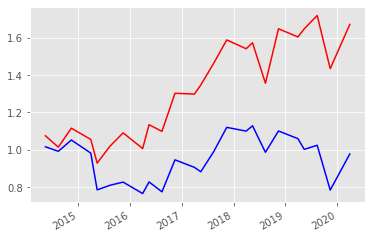

In [8]:
history = dataset_test.copy()
history['svm prediction'] = cf.predict(dataset_test[features])
history = history.reset_index()

dates = sorted(list(set(history['date'])))

seasonal_returns1 = []
seasonal_returns2 = []
for date in dates:
    current_stocks = history[history['date'] == date]
    buy_stocks = current_stocks[current_stocks['svm prediction'] == True]
    sell_stocks = current_stocks[current_stocks['svm prediction'] == False]
    
    seasonal_return1 = buy_stocks['return'].mean()
    seasonal_returns1.append(seasonal_return1)
    
    seasonal_return2 = sell_stocks['return'].mean()
    seasonal_returns2.append(seasonal_return2)

import matplotlib.pyplot as plt
plt.style.use("ggplot")

pd.Series(seasonal_returns1, index=dates).cumprod().plot(color='red')
pd.Series(seasonal_returns2, index=dates).cumprod().plot(color='blue')